In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read the city data file and store it in a Pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read the ride data file and store it in a Pandas DataFrame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [6]:
# Find total rides by city type.
sum_total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
sum_total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [7]:
# Find total drivers by city type.
sum_total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
sum_total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [8]:
# Find total fares by city type.
sum_total_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [9]:
# Average fare per ride.
avg_fare_per_ride = sum_total_fares / sum_total_rides
avg_fare_per_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [10]:
# Average fare per driver.
avg_fare_per_driver = sum_total_fares / sum_total_drivers
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [11]:
# Create the Summary DataFrame.
summary_data_df = pd.DataFrame({"Total Rides" : sum_total_rides, 
                                "Total Drivers" : sum_total_drivers,
                                "Total Fares" : sum_total_fares,
                                "Average Fare per Ride" : avg_fare_per_ride,
                                "Average Fare per Driver" : avg_fare_per_driver})

summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [12]:
# Delete Index Name
summary_data_df.index.name = None

# Format data to show commas, include dollar signs, and show two decimal places.
summary_data_df["Total Rides"] = summary_data_df["Total Rides"].map("{:,}".format)

summary_data_df["Total Drivers"] = summary_data_df["Total Drivers"].map("{:,}".format)

summary_data_df["Total Fares"] = summary_data_df["Total Fares"].map("${:,.2f}".format)

summary_data_df["Average Fare per Ride"] = summary_data_df["Average Fare per Ride"].map("${:.2f}".format)

summary_data_df["Average Fare per Driver"] = summary_data_df["Average Fare per Driver"].map("${:.2f}".format)

summary_data_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [13]:
# Rename merged DataFrame columns.
pyber_data_df = pyber_data_df.rename(columns={'city':'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

pyber_data_df.head()

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
# Set the index to the Date column.
pyber_data_df = pyber_data_df.set_index("Date")
pyber_data_df.head()

,City,Fare,Ride Id,No. Drivers,City Type
Date,,,,,
2019-01-14 10:14:22,Lake Jonathanshire,13.83,5739410935873,5,Urban
2019-03-04 18:24:09,South Michelleport,30.24,2343912425577,72,Urban
2019-02-24 04:29:00,Port Samanthamouth,33.44,2005065760003,57,Urban
2019-02-10 23:22:03,Rodneyfort,23.44,5149245426178,34,Urban
2019-03-06 04:28:35,South Jack,34.58,3908451377344,46,Urban


In [15]:
# Create new DataFrame using copy() function.
new_pyber_data_df = pyber_data_df[['City Type', 'Fare']].copy()
new_pyber_data_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [16]:
# Set the Date value type to datetime.
import datetime

new_pyber_data_df.index = pd.to_datetime(new_pyber_data_df.index)
new_pyber_data_df.head()

,City Type,Fare
Date,,
2019-01-14 10:14:22,Urban,13.83
2019-03-04 18:24:09,Urban,30.24
2019-02-24 04:29:00,Urban,33.44
2019-02-10 23:22:03,Urban,23.44
2019-03-06 04:28:35,Urban,34.58


In [17]:
# Use info() method to make sure index is a datetime data type. 
new_pyber_data_df = new_pyber_data_df.info()
new_pyber_data_df

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-14 10:14:22 to 2019-04-25 10:20:13
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   City Type  2375 non-null   object 
 1   Fare       2375 non-null   float64
dtypes: float64(1), object(1)
memory usage: 55.7+ KB


In [18]:
# Find total fares by city type and date.
new_sum_total_fares_df = pd.DataFrame(pyber_data_df.groupby(["City Type" , "Date"]).sum()["Fare"])
new_sum_total_fares_df.head()

Fare
City Type Date                      
Rural     2019-01-01 09:45:36  43.69
          2019-01-02 11:18:32  52.12
          2019-01-03 19:51:01  19.90
          2019-01-04 03:31:26  24.88
          2019-01-06 07:38:40  47.33

In [19]:
# Create a pivot tale DataFrame.
new_sum_total_fares_df = pd.pivot_table(new_sum_total_fares_df, values="Fare", index="Date", columns=["City Type"])
new_sum_total_fares_df.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [20]:
# Create a new DataFrame from the pivot table DataFrame on the given date.
new_sum_total_fares_df = new_sum_total_fares_df.loc['2019-01-01':'2019-04-28']
new_sum_total_fares_df.head(10)

City Type,Rural,Suburban,Urban
Date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [21]:
# Make sure Date index data is datetime type.
new_sum_total_fares_df.index = pd.to_datetime(new_sum_total_fares_df.index)

new_sum_total_fares_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2177 entries, 2019-01-01 00:08:16 to 2019-04-27 23:52:44
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  567 non-null    float64
 2   Urban     1496 non-null   float64
dtypes: float64(3)
memory usage: 68.0 KB


In [22]:
# Create a new DataFrame by setting the DataFrame with resample() in weekly bins, and calculate the sum() of the fares for each week in the resampled data.
new_sum_total_fares_df = new_sum_total_fares_df.resample('W').sum()
new_sum_total_fares_df

City Type,Rural,Suburban,Urban
Date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


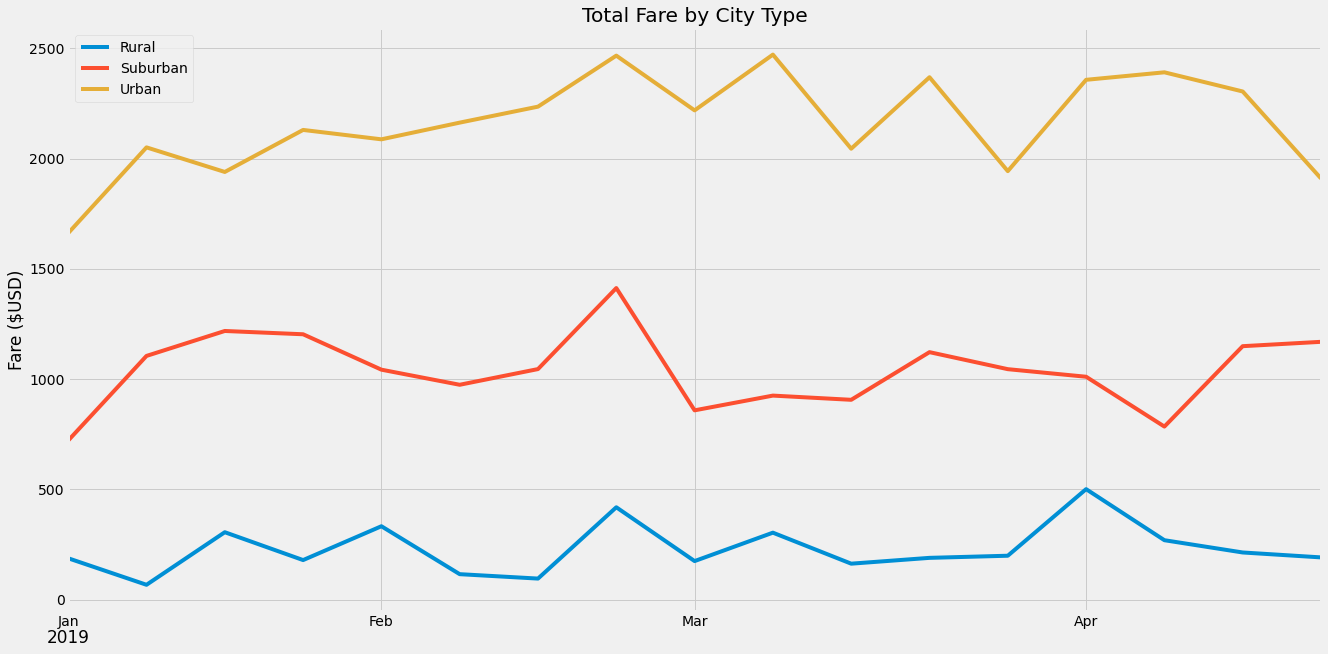

In [29]:
# Plot the data using FiveThirtyEight graphing style.
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(new_sum_total_fares_df, label='best')

# Set axis labels and title
ax.set_xlabel('2019')
ax.xaxis.set_label_coords(0,-.03)

ax.set_ylabel('Fare ($USD)')

ax.set_title('Total Fare by City Type')

# Set x-axis ticks and labels
xticks = ['2019-01-06', '2019-02-03', '2019-03-03', '2019-04-07']
xticks = pd.to_datetime(xticks)
ax.set_xticks(xticks, minor=False )

xtick_labels = ['Jan','Feb','Mar','Apr']
ax.set_xticklabels(xtick_labels)

# Set x-axis limits.
tstart = pd.to_datetime('2019-01-06')
tend = pd.to_datetime('2019-04-28')
ax.set_xlim(tstart, tend)

# Add the legend.
ax.legend(labels=['Rural', 'Suburban', 'Urban'])

# Save Figure
plt.savefig("analysis/Challenge_Fig.png")

# Show Figure
plt.show()